In [7]:
from torch import tensor, tanh, sum
from matplotlib import pyplot as plt

import matplotlib
import torchviz

trainx = [ [0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0] ]
trainy = [ 0.0, 1.0, 1.0, 1.0 ]


inputs = tensor(trainx)
weights = tensor([0.2, 0.2], requires_grad=True)
bias = tensor([0.1], requires_grad=True)
parameters = [ weights, bias ]


In [24]:
class Neuron:

    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def __call__(self, inputs):
        linear = inputs @ weights + bias
        result = tanh(linear)
        return result

def mean_square_root(y, y_expected):
    return ((y - y_expected)**2).mean()


In [25]:
stats = []
neuron = Neuron(weights, bias)


[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]] 
 [0.0, 1.0, 1.0, 1.0] 
 tensor([9.0916e-04, 9.8488e-01, 9.8488e-01, 9.9988e-01],
       grad_fn=<TanhBackward0>) 
 tensor(0.0001, grad_fn=<MeanBackward0>) 
 tensor([2.4378, 2.4378], requires_grad=True) 
 tensor([0.0009], requires_grad=True)
tensor([-0.0002, -0.0002])
tensor([8.1828e-07])


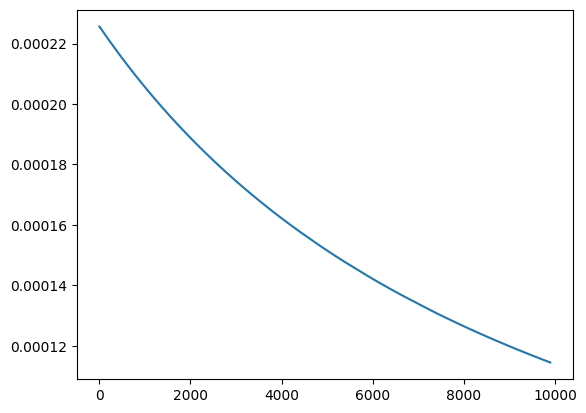

In [40]:

for i in range(1000):
    nonlinear = neuron(inputs)
    loss = mean_square_root(nonlinear, tensor(trainy))
    if i % 10:
        stats.append(loss.data)

    for p in parameters:
        p.grad = None


    loss.backward()
    lr = 0.05
    for p in parameters:
        p.data = p.data - (lr * p.grad.data)

print( trainx, "\n", trainy, "\n", nonlinear, "\n", loss, "\n", weights, "\n", bias )
for p in parameters:
    print(p.grad)
plt.plot(stats)

In [41]:
neuron(tensor([0.0, 0.0]))

tensor([0.0009], grad_fn=<TanhBackward0>)

In [42]:
neuron(tensor([1.0, 0.0]))

tensor([0.9849], grad_fn=<TanhBackward0>)

In [43]:
neuron(tensor([0.0, 1.0]))

tensor([0.9849], grad_fn=<TanhBackward0>)

In [44]:
neuron(tensor([1.0, 1.0]))

tensor([0.9999], grad_fn=<TanhBackward0>)